In [25]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
import os
import tensorflow as tf


data_path = 'data/training'
img_size = 224
batch_size = 32 


datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  
    validation_split=0.2  
)


train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    color_mode='grayscale',  
    batch_size=batch_size,
    class_mode='categorical',
    subset='training', 
    shuffle=True
)


validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    color_mode='grayscale',  
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation', 
    shuffle=True
)

print("Class indices:", train_generator.class_indices)




Found 1647 images belonging to 3 classes.
Found 409 images belonging to 3 classes.
Class indices: {'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)


train_data = train_datagen.flow_from_directory(
    "data/training",
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    color_mode='rgb'
)

val_data = val_datagen.flow_from_directory(
    "data/testing",
    target_size=(64, 64),
    batch_size=32,
    class_mode="categorical",
    color_mode='rgb'
)


simple_model = Sequential()
simple_model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(64, 64, 3)))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_model.add(Conv2D(64, (3, 3), activation="relu"))
simple_model.add(MaxPooling2D(pool_size=(2, 2)))
simple_model.add(Flatten())
simple_model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.001)))  
simple_model.add(Dropout(0.5))  
simple_model.add(Dense(train_data.num_classes, activation="softmax"))


simple_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


simple_model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[early_stopping])


val_loss, val_accuracy = simple_model.evaluate(val_data, verbose=1)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


Found 2056 images belonging to 3 classes.
Found 96 images belonging to 3 classes.


c:\Users\123\Potato-Late-blight_Early-blight-model\disease\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\123\Potato-Late-blight_Early-blight-model\disease\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.5204 - loss: 0.9974 - val_accuracy: 0.4896 - val_loss: 1.0628
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.7507 - loss: 0.6758 - val_accuracy: 0.6250 - val_loss: 0.7672
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.8352 - loss: 0.5268 - val_accuracy: 0.4688 - val_loss: 1.2610
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.8464 - loss: 0.4265 - val_accuracy: 0.5729 - val_loss: 0.9588
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.8720 - loss: 0.3680 - val_accuracy: 0.5833 - val_loss: 0.7687
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.8649 - loss: 0.3834 - val_accuracy: 0.5938 - val_loss: 0.7982
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - accuracy: 0.8863 - loss: 0.3368 - val_accuracy: 0.5521 - val_loss: 0.9138
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6406 - loss: 0.7359
Validation Loss: 0.767182826

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l1

optimal = Sequential()
optimal.add(Conv2D(16, (3, 3), activation="relu", input_shape=(64, 64, 3), kernel_regularizer=l1(l1=0.001)))
optimal.add(MaxPooling2D(pool_size=(2, 2)))
optimal.add(Dropout(0.5))
optimal.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l1(l1=0.001)))
optimal.add(MaxPooling2D(pool_size=(2, 2)))
optimal.add(Flatten())
optimal.add(Dense(64, activation="relu", kernel_regularizer=l1(l1=0.001)))
optimal.add(Dropout(0.3))
optimal.add(
    Dense(train_generator.num_classes, activation="softmax")
) 
optimal.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

optimal.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812,803 (3.10 MB)

 Trainable params: 812,803 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
optimal.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


optimal_history = simple_model.fit(train_data, epochs=10, validation_data=val_data)

optimal.save('saved_models/model2.keras')

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.8183 - loss: 0.5387 - val_accuracy: 0.6458 - val_loss: 0.6970
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.8463 - loss: 0.4480 - val_accuracy: 0.5104 - val_loss: 1.1418
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - accuracy: 0.8941 - loss: 0.3262 - val_accuracy: 0.4479 - val_loss: 1.3081
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - accuracy: 0.8848 - loss: 0.3369 - val_accuracy: 0.8021 - val_loss: 0.6539
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.8781 - loss: 0.3592 - val_accuracy: 0.7708 - val_loss: 0.6329
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.8979 - loss: 0.3187 - val_accuracy: 0.7708 - val_loss: 0.6603
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.9078 - loss: 0.2785 - val_accuracy: 0.7708 - val_loss: 0.7439
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.9101 - loss: 0.2791 - val_accur

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Total Misclassifications: 134


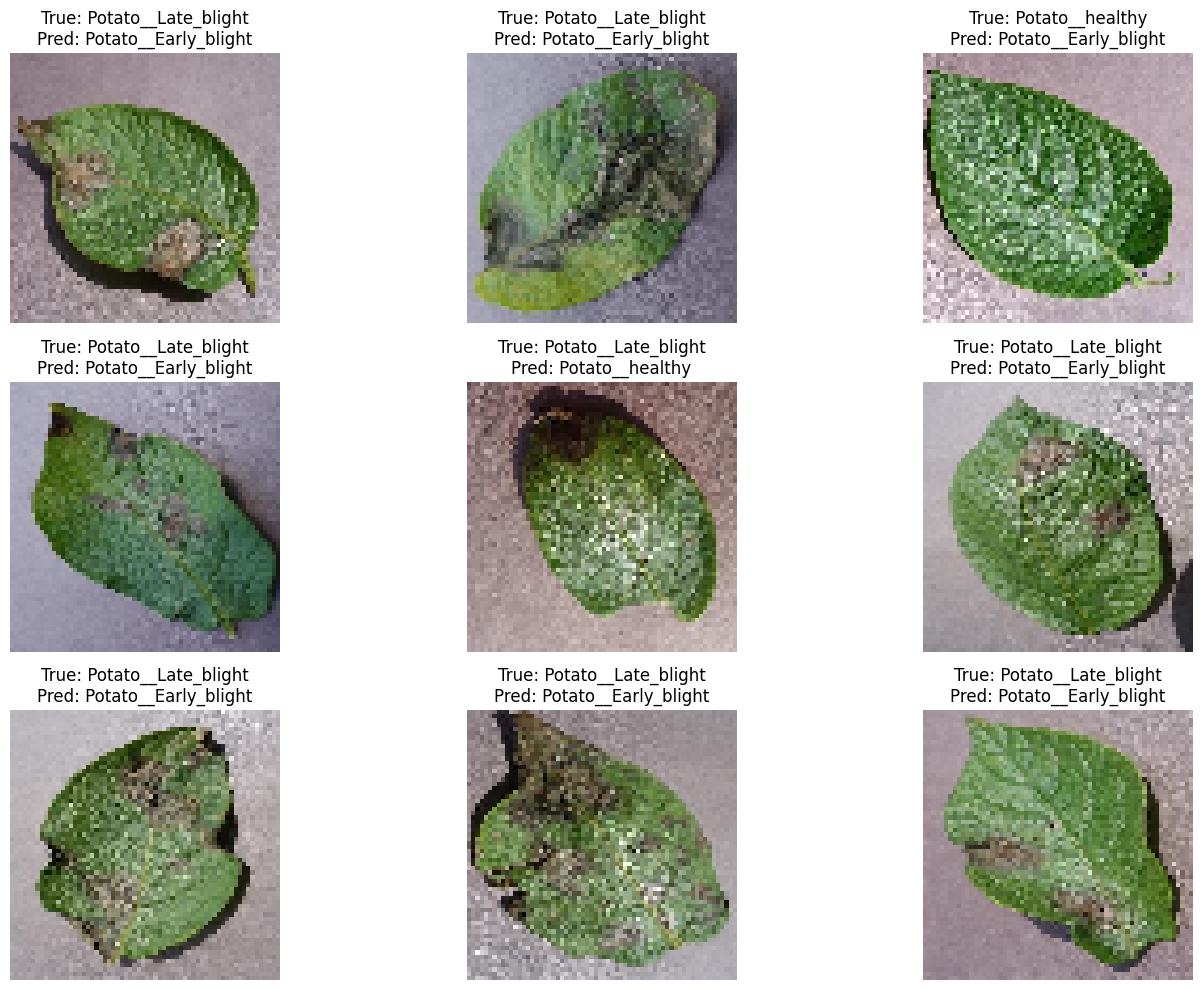

In [30]:
import numpy as np
import matplotlib.pyplot as plt

class_labels = ['Potato__Early_blight', 'Potato__Late_blight', 'Potato__healthy']


val_data.reset()


misclassified_images = []
misclassified_true_labels = []
misclassified_pred_labels = []


max_batches = 10  
batch_count = 0


for images, labels in val_data:
    predictions_batch = simple_model.predict(images)  
    predicted_classes_batch = np.argmax(predictions_batch, axis=1)  
    true_classes_batch = np.argmax(labels, axis=1)  

  
    misclassifications = predicted_classes_batch != true_classes_batch
    misclassified_indices = np.where(misclassifications)[0]

  
    for idx in misclassified_indices:
        misclassified_images.append(images[idx])  
        misclassified_true_labels.append(true_classes_batch[idx])  
        misclassified_pred_labels.append(predicted_classes_batch[idx])  

    batch_count += 1
    if batch_count >= max_batches:  
        break

print(f'Total Misclassifications: {len(misclassified_images)}')


plt.figure(figsize=(15, 10))
for i in range(min(9, len(misclassified_images))):  
    plt.subplot(3, 3, i + 1)
    plt.imshow(misclassified_images[i])  
    plt.title(f'True: {class_labels[misclassified_true_labels[i]]}\nPred: {class_labels[misclassified_pred_labels[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

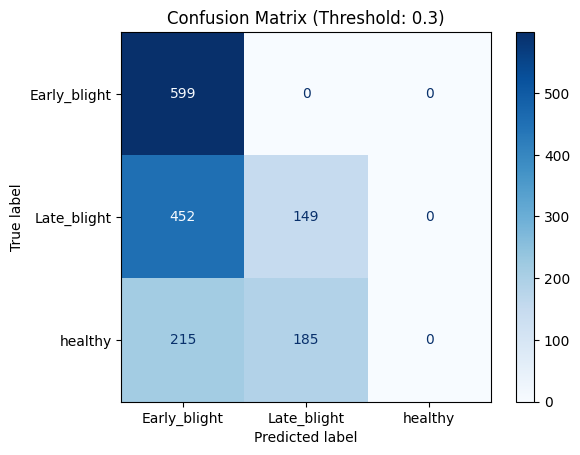

Confusion Matrix (Threshold: 0.3):
 [[599   0   0]
 [452 149   0]
 [215 185   0]]


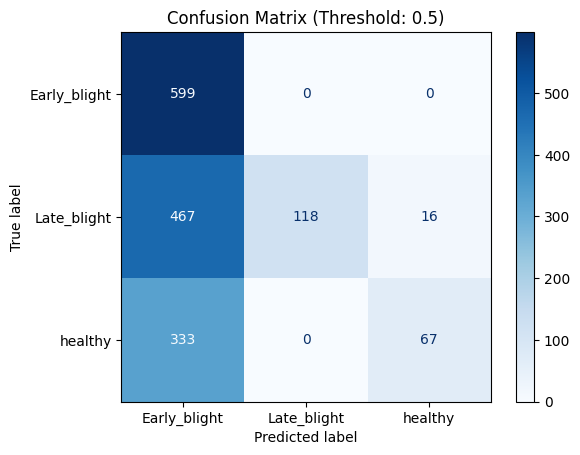

Confusion Matrix (Threshold: 0.5):
 [[599   0   0]
 [467 118  16]
 [333   0  67]]


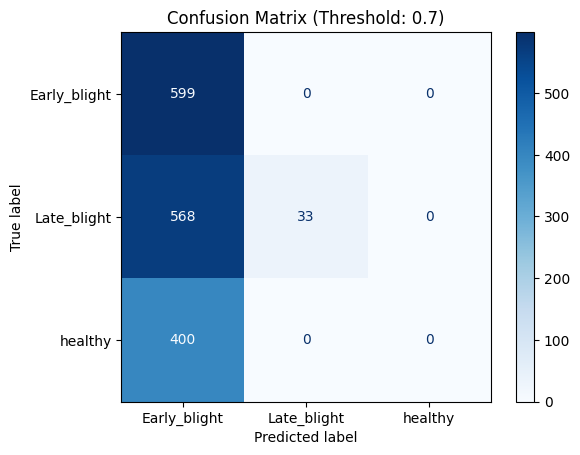

Confusion Matrix (Threshold: 0.7):
 [[599   0   0]
 [568  33   0]
 [400   0   0]]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter

class_labels = ['Early_blight', 'Late_blight', 'healthy']

val_data.reset()

true_labels = []
pred_labels = []
all_predictions = []

max_batches = 50
batch_count = 0

for images, labels in val_data:
    predictions_batch = simple_model.predict(images)
    predicted_classes_batch = np.argmax(predictions_batch, axis=1)
    true_classes_batch = np.argmax(labels, axis=1)

    true_labels.extend(true_classes_batch)
    pred_labels.extend(predicted_classes_batch)
    all_predictions.extend(predictions_batch)

    batch_count += 1
    if batch_count >= max_batches:
        break

class_distribution = Counter(true_labels)
print("Class distribution in validation set:", class_distribution)

def adjust_predictions(predictions, threshold=0.5):
    return [1 if pred >= threshold else 0 for pred in predictions]

thresholds = [0.3, 0.5, 0.7]
for threshold in thresholds:
    adjusted_preds = [adjust_predictions(pred, threshold) for pred in all_predictions]
    adjusted_pred_labels = [np.argmax(pred) for pred in adjusted_preds]
    
    cm = confusion_matrix(true_labels, adjusted_pred_labels)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.show()

    print(f"Confusion Matrix (Threshold: {threshold}):\n", cm)




In [32]:
from tensorflow.keras.saving import save_model

save_model(simple_model, 'Potato-Late-blight_Early-blight-model.keras')
print("model saved successfuly ")


model saved successfuly 
